In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

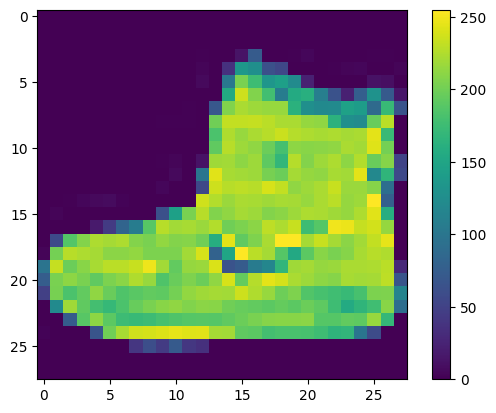

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
#normalize data
train_images = train_images / 255.0

test_images = test_images / 255.0

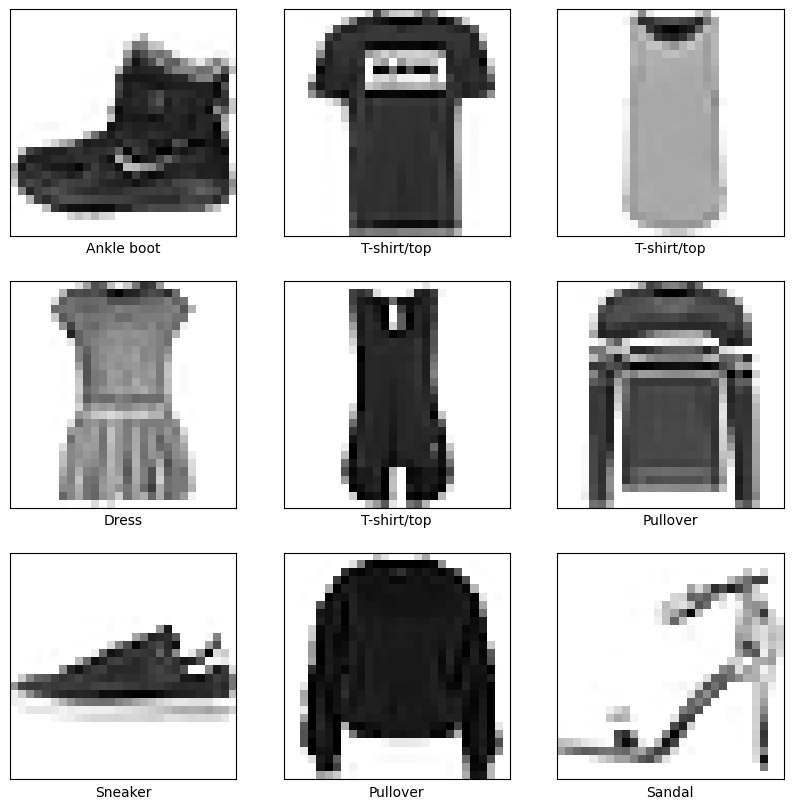

In [7]:
# lets see the data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# Using the model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/50
1875/1875 - 11s - loss: 0.2735 - accuracy: 0.8971 - val_loss: 0.3250 - val_accuracy: 0.8819 - 11s/epoch - 6ms/step
Epoch 2/50
1875/1875 - 11s - loss: 0.2695 - accuracy: 0.8995 - val_loss: 0.3256 - val_accuracy: 0.8836 - 11s/epoch - 6ms/step
Epoch 3/50
1875/1875 - 11s - loss: 0.2703 - accuracy: 0.8980 - val_loss: 0.3269 - val_accuracy: 0.8871 - 11s/epoch - 6ms/step
Epoch 4/50
1875/1875 - 11s - loss: 0.2688 - accuracy: 0.8996 - val_loss: 0.3142 - val_accuracy: 0.8896 - 11s/epoch - 6ms/step
Epoch 5/50
1875/1875 - 11s - loss: 0.2677 - accuracy: 0.8997 - val_loss: 0.3124 - val_accuracy: 0.8873 - 11s/epoch - 6ms/step
Epoch 6/50
1875/1875 - 11s - loss: 0.2641 - accuracy: 0.9018 - val_loss: 0.3150 - val_accuracy: 0.8902 - 11s/epoch - 6ms/step
Epoch 7/50
1875/1875 - 11s - loss: 0.2598 - accuracy: 0.9024 - val_loss: 0.3188 - val_accuracy: 0.8910 - 11s/epoch - 6ms/step
Epoch 8/50
1875/1875 - 11s - loss: 0.2604 - accuracy: 0.9038 - val_loss: 0.3275 - val_accuracy: 0.8883 - 11s/epoch - 6

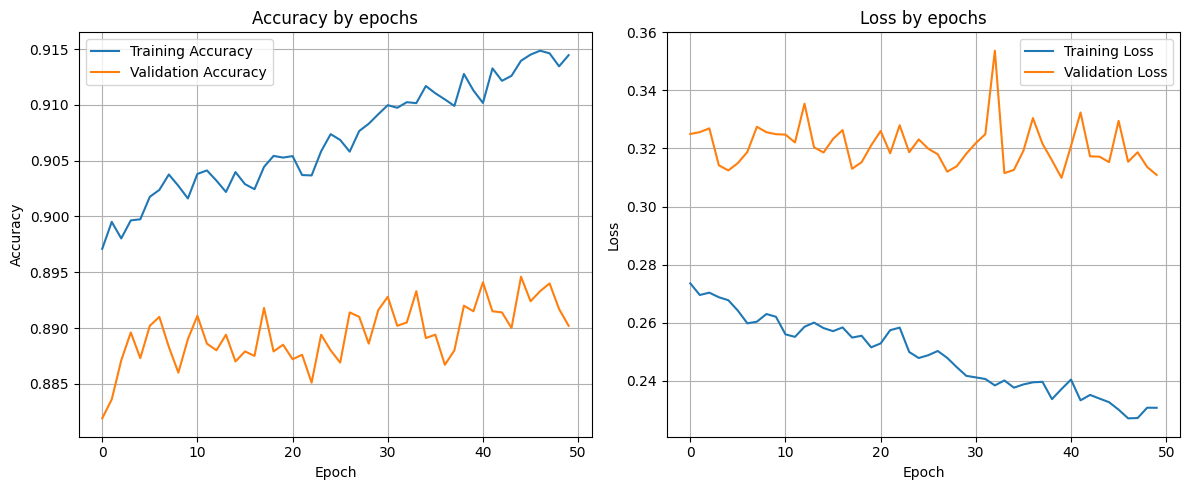

In [15]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy by epochs')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()